# Preparação do ambiente

## Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from os import path as osp
from tqdm.auto import tqdm
from unicodedata import normalize
from wordcloud import WordCloud

## Constantes e funções auxiliares

In [2]:
FILE_ITEMS = '../datasets/label_issues/20240423/results/items.parquet'
FILE_SAMPLES_RESULTS = '../datasets/label_issues/20240423/results/samples_results.parquet'

In [3]:
def clean_text(doc, return_tokens=False):

    stop_words = stopwords.words('portuguese')
    stop_words.extend(stopwords.words('english'))
    stop_words.extend(list(string.punctuation))
    
    # stopwords específicas do domínio
    # stop_words.extend(['cm', 'feature', 'features', 'informações', 'itens', 'leve', 'list', 'nulo', 'package', 'pacote', 'pacotes', 'recurso', 'tamanho', 'ver'])
    # remover da lista de stopwords a palavra sem para formar o bigrama "sem fio", relevante para o domínio
    # primeira rodada de classificação demonstrou que não foi uma boa escolha
    # stop_words.remove('sem')
    
    doc = doc.lower()
    doc = normalize('NFKD', doc).encode('ASCII', 'ignore').decode('ASCII')

    tokens = [token for token in word_tokenize(doc, language='portuguese') if token not in stop_words]

    if return_tokens:
        return tokens
    else:
        return ' '.join(tokens)

# Carga e prepação dos dados

In [4]:
df_items = pd.read_parquet(FILE_ITEMS)
df_items['doc'] = df_items['nome'].map(clean_text)
df_items['tokens'] = df_items['nome'].apply(lambda doc: clean_text(doc, return_tokens=True))

columns_to_keep = ['id', 'nome', 'doc', 'tokens', 
                   'titulo_bem_elaborado', 'titulo_identifica_produto',
                   'passivel_homologacao', 'transmissor_rf', 'tipo_produto']

df_items = df_items[columns_to_keep]
df_items

,id,nome,doc,tokens,titulo_bem_elaborado,titulo_identifica_produto,passivel_homologacao,transmissor_rf,tipo_produto
0,126504,Controle Remoto Tv Samsung Smart,controle remoto tv samsung smart,"[controle, remoto, tv, samsung, smart]",1,1,1,1,Transceptor de radiofrequência (VHF/UHF)
1,126505,Smartphone Redmi 9t Xiaomi Com Película E Capa...,smartphone redmi 9t xiaomi pelicula capa seminovo,"[smartphone, redmi, 9t, xiaomi, pelicula, capa...",1,1,1,1,Smartphones
2,126506,Drone DJI Mini 3 Pro DJI RC-N1 (Sem tela) Fly ...,drone dji mini 3 pro dji rc-n1 tela fly kit pl...,"[drone, dji, mini, 3, pro, dji, rc-n1, tela, f...",1,1,1,1,Drone
3,126507,Smartphone Samsumg J5 Prime,smartphone samsumg j5 prime,"[smartphone, samsumg, j5, prime]",1,1,1,1,Smartphones
4,126508,"Tablet PC, 12 GB RAM 256 GB ROM US Plug 100-24...",tablet pc 12 gb ram 256 gb rom us plug 100-240...,"[tablet, pc, 12, gb, ram, 256, gb, rom, us, pl...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
...,...,...,...,...,...,...,...,...,...
4347,125715,CAIXA ACUSTICA PCX6500,caixa acustica pcx6500,"[caixa, acustica, pcx6500]",0,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
4348,125716,Conector de cauda de celular 10 pcs carregando...,conector cauda celular 10 pcs carregando conec...,"[conector, cauda, celular, 10, pcs, carregando...",1,1,0,0,Outro tipo/categoria (não listada acima)
4349,125717,Avantree Medley Clear - Fones de ouvido sem fi...,avantree medley clear fones ouvido fio ouvir t...,"[avantree, medley, clear, fones, ouvido, fio, ...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)
4350,125718,"Hilitand Adaptador sem fio, placa de rede sem ...",hilitand adaptador fio placa rede fio adaptado...,"[hilitand, adaptador, fio, placa, rede, fio, a...",1,1,1,1,Transceptor de radiação restrita (2.4GHz/5.8GHz)


In [5]:
df_issues = pd.read_parquet(FILE_SAMPLES_RESULTS)
columns_to_keep = ['id','subject']
df_issues = df_issues[columns_to_keep]
df_issues

,id,subject
0,125708,LABEL_PACP_2024_00021505
1,125709,LABEL_PACP_2024_00021506
2,125710,LABEL_PACP_2024_00021507
3,125711,LABEL_PACP_2024_00021508
4,125712,LABEL_PACP_2024_00021509
...,...,...
21511,147227,LABEL_PACP_2024_00002556
21512,147228,LABEL_PACP_2024_00002557
21513,147229,LABEL_PACP_2024_00002558
21514,147230,LABEL_PACP_2024_00002559


# Análise preliminar

## Conteúdo do título

### Palavras mais frequentes

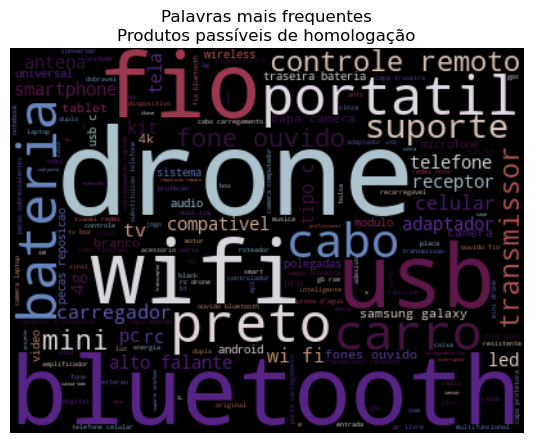

In [6]:
words = ' '.join(df_items['doc'])

wc = WordCloud(height=300,random_state=1,colormap='twilight').generate(words)

fig,ax = plt.subplots(1,1,figsize=(7,5))
ax.imshow(wc, interpolation="bilinear")
ax.axis("off")
ax.set_title('Palavras mais frequentes\nProdutos passíveis de homologação')
plt.show()

### Produtos passíveis e não passíveis de homologação

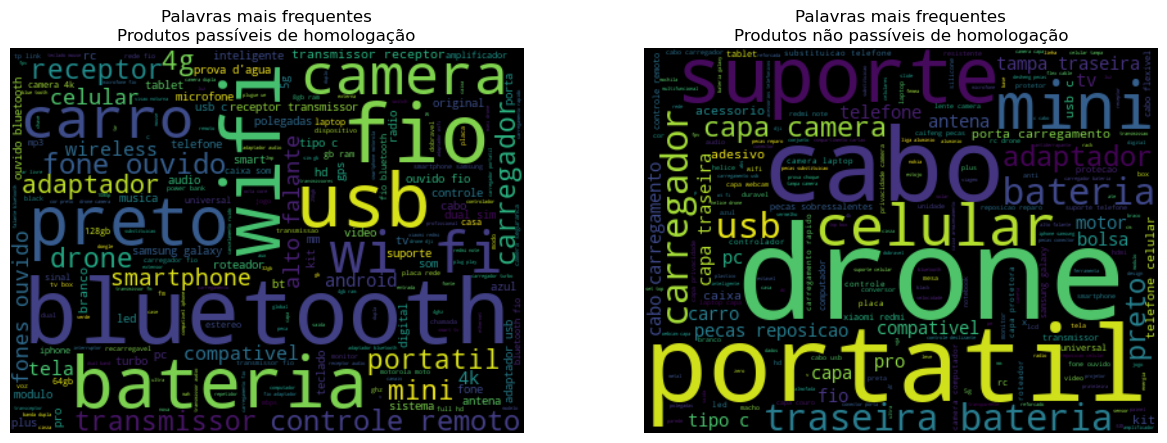

In [7]:
docs_passivel_homologacao = df_items[df_items['passivel_homologacao']==1]['doc']
docs_nao_passivel_homologacao = df_items[df_items['passivel_homologacao']==0]['doc']

words_passivel_homologacao = ' '.join(docs_passivel_homologacao)
words_nao_passivel_homologacao = ' '.join(docs_nao_passivel_homologacao)

wc_passivel_homologacao = WordCloud(height=300).generate(words_passivel_homologacao)
wc_nao_passivel_homologacao = WordCloud(height=300).generate(words_nao_passivel_homologacao)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_passivel_homologacao, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nProdutos passíveis de homologação')

ax[1].imshow(wc_nao_passivel_homologacao, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nProdutos não passíveis de homologação')

plt.show()

### Produtos transmissores e não transmissores de radiofrequência

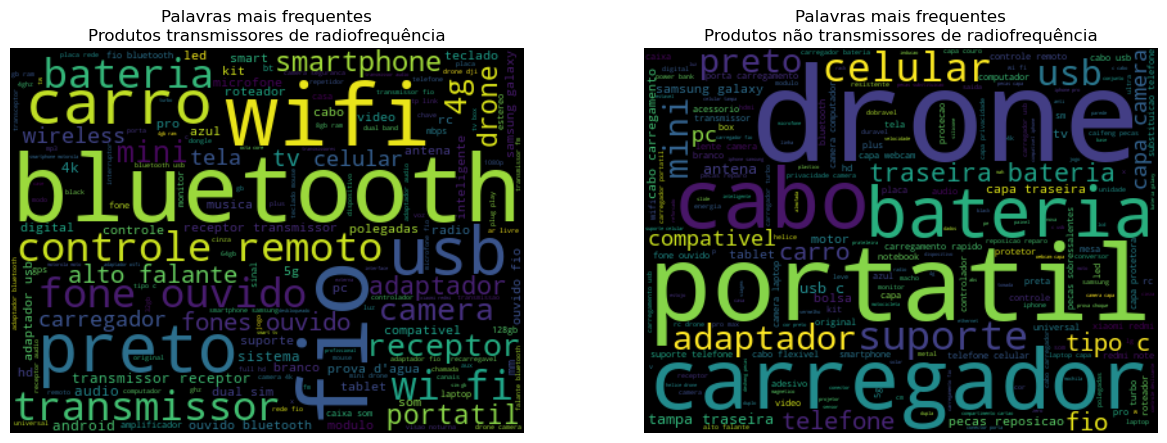

In [8]:
docs_transmissor_rf = df_items[df_items['transmissor_rf']==1]['doc']
docs_nao_transmissor_rf = df_items[df_items['transmissor_rf']==0]['doc']

words_transmissor_rf = ' '.join(docs_transmissor_rf)
words_nao_transmissor_rf = ' '.join(docs_nao_transmissor_rf)

wc_transmissor_rf = WordCloud(height=300).generate(words_transmissor_rf)
wc_nao_transmissor_rf = WordCloud(height=300).generate(words_nao_transmissor_rf)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_transmissor_rf, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nProdutos transmissores de radiofrequência')

ax[1].imshow(wc_nao_transmissor_rf, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nProdutos não transmissores de radiofrequência')

plt.show()

### Investigar drone

In [9]:
df_drones = df_items[df_items['doc'].str.contains('drone')]
df_drones.tipo_produto.value_counts()

tipo_produto
Outro tipo/categoria (não listada acima)            176
Drone                                               167
Não é possível afirmar                               43
Transceptor de radiação restrita (2.4GHz/5.8GHz)      7
Bateria não destinada a celular                       6
Carregador ou fonte não destinada a celular           3
Transceptor de radiofrequência (VHF/UHF)              1
Carregador para celular (inclusive powerbank)         1
Name: count, dtype: int64

In [10]:
df_drones.pivot_table(index='tipo_produto', columns='passivel_homologacao', values='id', aggfunc='count').fillna(0).astype('int')

passivel_homologacao,0,1,3
tipo_produto,,,
Bateria não destinada a celular,3,2,1
Carregador ou fonte não destinada a celular,0,2,1
Carregador para celular (inclusive powerbank),0,1,0
Drone,1,165,1
Não é possível afirmar,15,1,27
Outro tipo/categoria (não listada acima),162,8,6
Transceptor de radiação restrita (2.4GHz/5.8GHz),0,7,0
Transceptor de radiofrequência (VHF/UHF),0,1,0


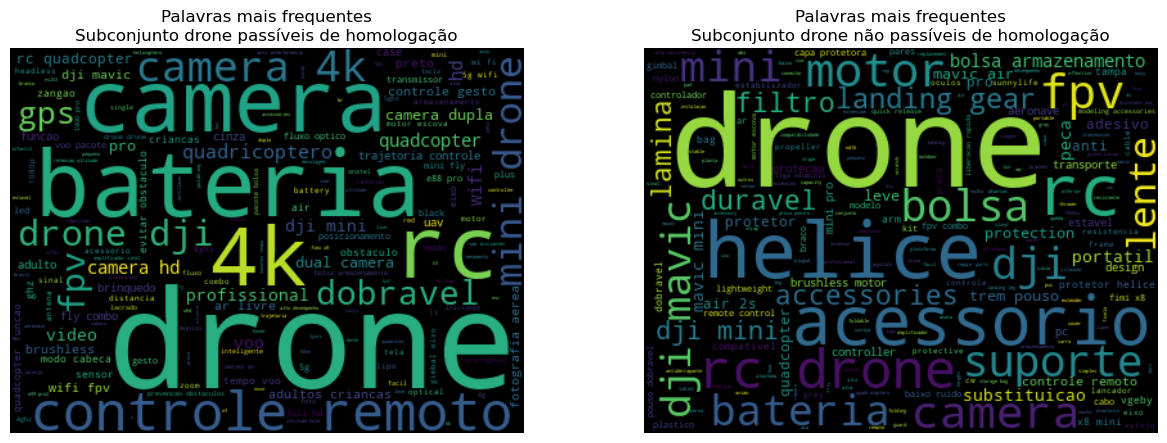

In [11]:
words_drone_passivel_homologacao = ' '.join(df_drones[df_drones['passivel_homologacao']==1]['doc'].to_list())
words_drone_nao_passivel_homologacao = ' '.join(df_drones[df_drones['passivel_homologacao']==0]['doc'].to_list())

wc_drone_passivel_homologacao = WordCloud(height=300).generate(words_drone_passivel_homologacao)
wc_drone_nao_passivel_homologacao = WordCloud(height=300).generate(words_drone_nao_passivel_homologacao)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_drone_passivel_homologacao, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nSubconjunto drone passíveis de homologação')

ax[1].imshow(wc_drone_nao_passivel_homologacao, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nSubconjunto drone não passíveis de homologação')

plt.show()


# Treinamento do classificador

## Classificador de linha base

### Preparação dos dados

In [12]:
from sklearn.dummy import DummyClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [13]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

In [14]:
docs = df_items[df_items['passivel_homologacao']<=1]['doc']
labels = df_items[df_items['passivel_homologacao']<=1]['passivel_homologacao']

X_train, X_test, y_train, y_test = train_test_split(docs, labels, test_size=0.25, random_state=724)

### Classificador Dummy

Accuracy of Dummy classifier on training set: 0.583
Accuracy of Dummy classifier on test set: 0.587
AUC of Dummy classifier on test set: 0.500

                              precision    recall  f1-score   support

Não passíveis de homologação       0.00      0.00      0.00       412
    Passíveis de homologação       0.59      1.00      0.74       585

                    accuracy                           0.59       997
                   macro avg       0.29      0.50      0.37       997
                weighted avg       0.34      0.59      0.43       997



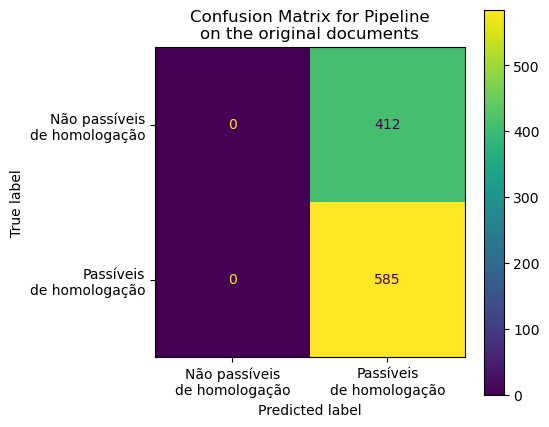

In [15]:
clf_dummy = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', DummyClassifier())])
clf_dummy.fit(X_train,y_train)
predicted = clf_dummy.predict(X_test)

target_names = ['Não passíveis de homologação','Passíveis de homologação']
target_names_confusion = ['Não passíveis\nde homologação','Passíveis\nde homologação']

print('Accuracy of Dummy classifier on training set: {:.3f}'
     .format(clf_dummy.score(X_train, y_train)))
print('Accuracy of Dummy classifier on test set: {:.3f}'
     .format(clf_dummy.score(X_test, y_test)))
print('AUC of Dummy classifier on test set: {:.3f}'
     .format(roc_auc_score(y_test,clf_dummy.predict_proba(X_test)[:,1])))

print()
print(classification_report(y_test, predicted, target_names=target_names))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted, ax=ax)
ax.xaxis.set_ticklabels(target_names_confusion)
ax.yaxis.set_ticklabels(target_names_confusion)
_ = ax.set_title(f"Confusion Matrix for {clf_dummy.__class__.__name__}\non the original documents")


### Classificador SGD

#### Parâmetros padrão

Accuracy of SGD classifier on training set: 0.974
Accuracy of SGD classifier on test set: 0.875
AUC of SGD classifier on test set: 0.944

                              precision    recall  f1-score   support

Não passíveis de homologação       0.87      0.81      0.84       412
    Passíveis de homologação       0.87      0.92      0.90       585

                    accuracy                           0.87       997
                   macro avg       0.87      0.87      0.87       997
                weighted avg       0.87      0.87      0.87       997



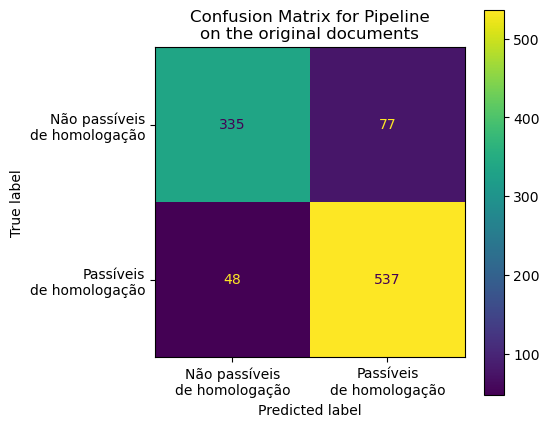

In [16]:
clf_sgd = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='log_loss'))])
clf_sgd.fit(X_train,y_train)
predicted = clf_sgd.predict(X_test)

print('Accuracy of SGD classifier on training set: {:.3f}'
     .format(clf_sgd.score(X_train, y_train)))
print('Accuracy of SGD classifier on test set: {:.3f}'
     .format(clf_sgd.score(X_test, y_test)))
print('AUC of SGD classifier on test set: {:.3f}'
     .format(roc_auc_score(y_test,clf_sgd.predict_proba(X_test)[:,1])))

print()
print(classification_report(y_test, predicted, target_names=target_names))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted, ax=ax)
ax.xaxis.set_ticklabels(target_names_confusion)
ax.yaxis.set_ticklabels(target_names_confusion)
_ = ax.set_title(f"Confusion Matrix for {clf_sgd.__class__.__name__}\non the original documents")

#### Pesquisa de parâmetros

In [17]:
# 'vectorizer__ngram_range': [(1,1), (1,2), (1,3), (2,2), (2,3)]
# 'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 'vectorizer__min_df': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# 'vectorizer__max_features': [5000,10000,15000,25000,30000,None]
# 'vectorizer__binary': [False, True]
# 'transformer__use_idf': [False, True]
# 'clf__loss': ['log_loss', 'modified_huber']
# 'clf__penalty': ['l1', 'l2']
# 'clf__alpha': [0.0001, 0.00001, 0.000001]


In [18]:
%%time
# vetorizar as palavras por contagem
vectorizer = CountVectorizer()

# transformar vetores aplicando TF-IDF
transformer = TfidfTransformer()

# classificardor SGD
clf = SGDClassifier()

# juntar tudo em pipeline
pipe = Pipeline(steps = [('vectorizer',vectorizer),('transformer',transformer),('clf',clf)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'vectorizer__ngram_range': [(1,1), (1,2), (1,3)],
    'transformer__use_idf': [False, True],
    'clf__loss': ['log_loss', 'modified_huber'],
    'clf__penalty': ['l1', 'l2'],
    'clf__alpha': [0.0001, 0.00001, 0.000001]
}

search = GridSearchCV(pipe, param_grid, n_jobs=6, scoring='roc_auc')
search.fit(docs, labels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.946):
{'clf__alpha': 0.0001, 'clf__loss': 'log_loss', 'clf__penalty': 'l2', 'transformer__use_idf': True, 'vectorizer__ngram_range': (1, 1)}
CPU times: total: 875 ms
Wall time: 14.8 s


#### Pesquisa de parâmetros complementar
Observar o efeito da quantidade de palavras na classificação

In [19]:
%%time
# vetorizar as palavras por contagem
vectorizer = CountVectorizer(ngram_range=(1,2))

# transformar vetores aplicando TF-IDF
transformer = TfidfTransformer(use_idf=True)

# classificardor SGD
clf = SGDClassifier(alpha=1e-5,loss='log_loss',penalty='l2')

# juntar tudo em pipeline
pipe = Pipeline(steps = [('vectorizer',vectorizer),('transformer',transformer),('clf',clf)])

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'vectorizer__min_df': [1,2,3,4,5,10,15,20]
}

search = GridSearchCV(pipe, param_grid, n_jobs=6, scoring='roc_auc')
search.fit(docs, labels)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.945):
{'vectorizer__min_df': 1}
CPU times: total: 594 ms
Wall time: 1.32 s


In [20]:
search.cv_results_

{'mean_fit_time': array([0.18698955, 0.14608011, 0.13357201, 0.1164062 , 0.12437434,
        0.12106233, 0.11256404, 0.11936126]),
 'std_fit_time': array([0.01197882, 0.00630965, 0.01439978, 0.01522953, 0.00959399,
        0.00765051, 0.00819002, 0.01179668]),
 'mean_score_time': array([0.0322124 , 0.0345468 , 0.03302941, 0.02458353, 0.02529879,
        0.0231164 , 0.02656174, 0.02008858]),
 'std_score_time': array([0.00975643, 0.00192165, 0.00791677, 0.00735035, 0.00745687,
        0.00792705, 0.00754617, 0.00664604]),
 'param_vectorizer__min_df': masked_array(data=[1, 2, 3, 4, 5, 10, 15, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'vectorizer__min_df': 1},
  {'vectorizer__min_df': 2},
  {'vectorizer__min_df': 3},
  {'vectorizer__min_df': 4},
  {'vectorizer__min_df': 5},
  {'vectorizer__min_df': 10},
  {'vectorizer__min_df': 15},
  {'vectorizer__min_df': 20}],
 'split0_test_score': a

#### Classificador com melhores parâmetros (pipeline)

Accuracy of SGD classifier on training set: 0.999
Accuracy of SGD classifier on test set: 0.881
AUC of SGD classifier on training set: 1.000
AUC of SGD classifier on test set: 0.933

                              precision    recall  f1-score   support

Não passíveis de homologação       0.87      0.83      0.85       401
    Passíveis de homologação       0.89      0.92      0.90       596

                    accuracy                           0.88       997
                   macro avg       0.88      0.87      0.87       997
                weighted avg       0.88      0.88      0.88       997



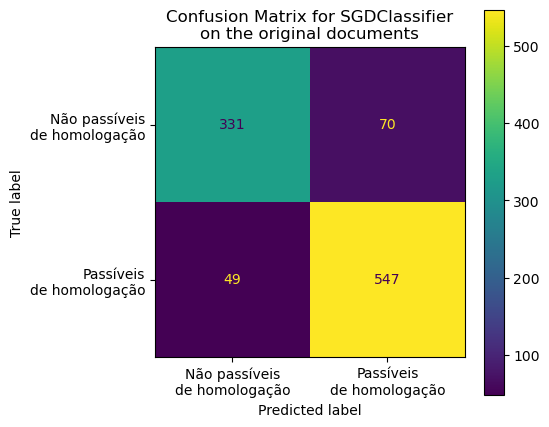

In [26]:
# vetorizar as palavras por contagem
tokenizer = lambda doc: clean_text(doc, return_tokens=True)
vectorizer = CountVectorizer(ngram_range=(1,1))

# transformar vetores aplicando TF-IDF
transformer = TfidfTransformer(use_idf=True)

# classificardor SGD
clf = SGDClassifier(alpha=1e-5, loss='log_loss', penalty='l2')

# juntar tudo em pipeline
pipe = Pipeline(steps = [('vectorizer',vectorizer),('transformer',transformer),('clf',clf)])

docs = df_items[df_items['passivel_homologacao']<=1]['nome']
labels = df_items[df_items['passivel_homologacao']<=1]['passivel_homologacao']

X_train, X_test, y_train, y_test = train_test_split(docs, labels, test_size=0.25, random_state=123)

pipe.fit(X_train,y_train)

predicted = pipe.predict(X_test)

print('Accuracy of SGD classifier on training set: {:.3f}'
     .format(pipe.score(X_train, y_train)))
print('Accuracy of SGD classifier on test set: {:.3f}'
     .format(pipe.score(X_test, y_test)))
print('AUC of SGD classifier on training set: {:.3f}'
     .format(roc_auc_score(y_train,pipe.predict_proba(X_train)[:,1])))
print('AUC of SGD classifier on test set: {:.3f}'
     .format(roc_auc_score(y_test,pipe.predict_proba(X_test)[:,1])))

print()
print(classification_report(y_test, predicted, target_names=target_names))

fig, ax = plt.subplots(figsize=(5, 5))
ConfusionMatrixDisplay.from_predictions(y_test, predicted, ax=ax)
ax.xaxis.set_ticklabels(target_names_confusion)
ax.yaxis.set_ticklabels(target_names_confusion)
_ = ax.set_title(f"Confusion Matrix for {pipe['clf'].__class__.__name__}\non the original documents")

#### Palavras mais relevantes para classificação

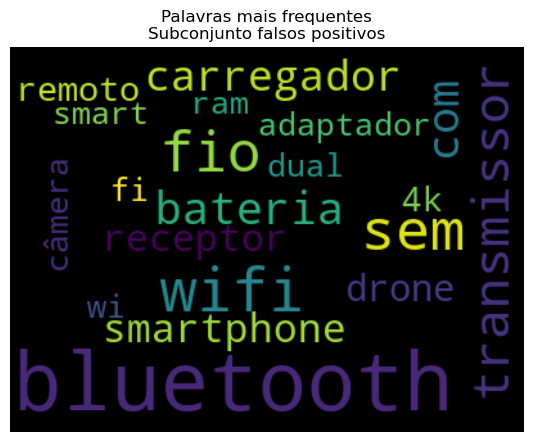

In [22]:
n_top_features = 20
label = target_names[-1]
feature_names = pipe['vectorizer'].get_feature_names_out()
X_train_count_vectors = pipe['vectorizer'].transform(X_train)
X_train_tfidf_vectors = pipe['transformer'].transform(X_train_count_vectors)
clf_coef = pipe['clf'].coef_
average_feature_effects = clf_coef * np.asarray(X_train_tfidf_vectors.mean(axis=0)).ravel()

top_indices = np.argsort(average_feature_effects[0])[-n_top_features:][::-1]
top = pd.DataFrame(feature_names[top_indices], columns=[label])
predictive_words = feature_names[top_indices]

top_featrues_frequency = {word:relevance for word,relevance in zip(predictive_words,average_feature_effects[0, top_indices])}
wc_top_featrues_frequency = WordCloud(height=300,random_state=100).generate_from_frequencies(top_featrues_frequency)
 
fig,ax = plt.subplots(1,1,figsize=(8,5))   
ax.imshow(wc_top_featrues_frequency, interpolation="bilinear")
ax.axis("off")
ax.set_title('Palavras mais relavantes para o classificador')
plt.show()

#### Análise de falsos negativos e positivos

In [23]:
def confusion_results(ground_truth,predicted):
    if ground_truth==0 and predicted==0:
        return 'TN'
    elif ground_truth==1 and predicted==1:
        return 'TP'
    elif ground_truth==0 and predicted==1:
        return 'FP'
    elif ground_truth==1 and predicted==0:
        return 'FN'
    else:
        return '#ERROR#'
        
df_test = pd.DataFrame(X_test)
df_test = df_test.join(df_items[['id','doc']])
df_test['link_to_fiscaliza'] = df_test['id'].apply(lambda id: f'https://sistemas.anatel.gov.br/fiscaliza/issues/{id}')
df_test['ground_truth'] = y_test
df_test['predicted'] = predicted
df_test['confusion_results'] = df_test[['ground_truth','predicted']].apply(lambda x: confusion_results(x['ground_truth'],x['predicted']),axis=1)
df_test

,nome,id,doc,link_to_fiscaliza,ground_truth,predicted,confusion_results
3174,"Bateria RC LiPo, leve, ¨¤ prova de choque, dro...",137868,bateria rc lipo leve prova choque drone fpv ba...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
1832,Carregador Veicular com 3 Saídas Usb Pro Chumb...,130766,carregador veicular 3 saidas usb pro chumbo i2...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
913,"Cabo de carregamento tipo C, cabo universal ti...",129847,cabo carregamento tipo c cabo universal tipo c...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
1900,"Suporte universal para celular, suporte de tel...",130834,suporte universal celular suporte telefone cel...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
72,Placa de proteção de bateria de célula de líti...,126593,placa protecao bateria celula litio 15a placa ...,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN
...,...,...,...,...,...,...,...
535,Sistema Wi-Fi mesh Tenda nova MW6 MW6 branco 1...,128518,sistema wi-fi mesh tenda nova mw6 mw6 branco 1...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
3037,"Câmera WiFi, Gravador de Vídeo WiFi HD 1080P 3...",137731,camera wifi gravador video wifi hd 1080p 30fps...,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
247,Drone Com 2 Câmeras Hd E 3 Sensores De Colisão...,127676,drone 2 cameras hd 3 sensores colisao ky603,https://sistemas.anatel.gov.br/fiscaliza/issue...,1,1,TP
2456,Jelly Jamm 50 Topper Tag Para Docinhos Doces,132684,jelly jamm 50 topper tag docinhos doces,https://sistemas.anatel.gov.br/fiscaliza/issue...,0,0,TN


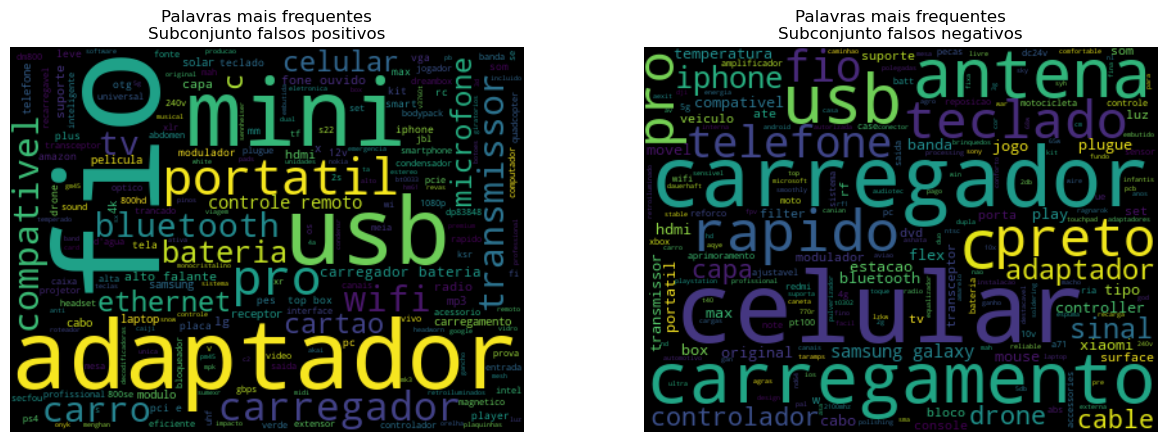

In [24]:
fp_words = ' '.join(df_test[df_test['confusion_results']=='FP']['doc'].to_list())
fn_words = ' '.join(df_test[df_test['confusion_results']=='FN']['doc'].to_list())

wc_fp = WordCloud(height=300).generate(fp_words)
wc_fn = WordCloud(height=300).generate(fn_words)
  
fig,ax = plt.subplots(1,2,figsize=(15,5))
    
ax[0].imshow(wc_fp, interpolation="bilinear")
ax[0].axis("off")
ax[0].set_title('Palavras mais frequentes\nSubconjunto falsos positivos')

ax[1].imshow(wc_fn, interpolation="bilinear")
ax[1].axis("off")
ax[1].set_title('Palavras mais frequentes\nSubconjunto falsos negativos')

plt.show()